In [227]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from pycaret.regression import *
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [228]:
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

## Voir ici pour plus d'info : https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [268]:
df = pd.read_csv('./data/train.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)
df['day'] = pd.to_datetime(df['datetime']).dt.dayofyear
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df.drop('datetime', axis=1, inplace=True)


df2 = df.drop(columns=['registered', 'casual'], index=1)


In [281]:
data =  pd.read_csv('./old/train.csv')

In [282]:
data["date"] = data['datetime'].apply(lambda x : x.split()[0])
data["hour"] = data['datetime'].apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data['datetime'].apply(lambda x : x.split()[0].split("-")[0])
data["month"] = data['date'].apply(lambda string : string.split('-')[1])
data["day"] = data['date'].apply(lambda  string: string.split('-')[2])

season=pd.get_dummies(data['season'],prefix='season')
data=pd.concat([data,season],axis=1)
weather=pd.get_dummies(data['weather'],prefix='weather')
data=pd.concat([data,weather],axis=1)
data.drop(['season','weather'],inplace=True,axis=1)
data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,month,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,01,01,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,01,01,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,01,01,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,01,01,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,01,01,1,0,0,0,1,0,0,0


In [283]:
del data['casual']
del data['registered']
data

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,date,hour,...,month,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,2011-01-01,0,...,01,01,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,2011-01-01,1,...,01,01,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,2011-01-01,2,...,01,01,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,2011-01-01,3,...,01,01,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,2011-01-01,4,...,01,01,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,2012-12-19,19,...,12,19,0,0,0,1,1,0,0,0
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,2012-12-19,20,...,12,19,0,0,0,1,1,0,0,0
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,2012-12-19,21,...,12,19,0,0,0,1,1,0,0,0
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,129,2012-12-19,22,...,12,19,0,0,0,1,1,0,0,0


In [284]:
del data['datetime']
del data['date']

In [285]:
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [286]:
data

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,year,month,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0000,16,0,2011,1,1,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0000,40,1,2011,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0000,32,2,2011,1,1,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0000,13,3,2011,1,1,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0000,1,4,2011,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,19,2012,12,19,0,0,0,1,1,0,0,0
10882,0,1,14.76,17.425,57,15.0013,241,20,2012,12,19,0,0,0,1,1,0,0,0
10883,0,1,13.94,15.910,61,15.0013,168,21,2012,12,19,0,0,0,1,1,0,0,0
10884,0,1,13.94,17.425,61,6.0032,129,22,2012,12,19,0,0,0,1,1,0,0,0


In [287]:
data.dtypes

holiday         int64
workingday      int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
hour            int32
year            int32
month           int32
day             int32
season_1        uint8
season_2        uint8
season_3        uint8
season_4        uint8
weather_1       uint8
weather_2       uint8
weather_3       uint8
weather_4       uint8
dtype: object

In [288]:
data['temp'] = data['temp'].apply(lambda x : np.log1p(x))

data['atemp'] = data['atemp'].apply(lambda x : np.log1p(x))

data['humidity'] = data['humidity'].apply(lambda x : np.log1p(x))

data['windspeed'] = data['windspeed'].apply(lambda x : np.log1p(x))

data['count'] = data['count'].apply(lambda x : np.log1p(x))

data['hour'] = data['hour'].apply(lambda x : np.log1p(x))

for index, row in data.iterrows():
    if(row['year'] == 2012 and row['month'] == 9 and row['day'] == 1):
        break

data['month'] = data['month'].apply(lambda x : np.log1p(x))

data['day'] = data['day'].apply(lambda x : np.log1p(x))

year=pd.get_dummies(data['year'],prefix='year')
data=pd.concat([data,year],axis=1)

test = data[index:]
train = data[:index]
del data['year']


In [289]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,year,month,...,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
0,0,0,2.383243,2.734043,4.406719,0.000000,2.833213,0.000000,2011,0.693147,...,1,0,0,0,1,0,0,0,1,0
1,0,0,2.304583,2.683416,4.394449,0.000000,3.713572,0.693147,2011,0.693147,...,1,0,0,0,1,0,0,0,1,0
2,0,0,2.304583,2.683416,4.394449,0.000000,3.496508,1.098612,2011,0.693147,...,1,0,0,0,1,0,0,0,1,0
3,0,0,2.383243,2.734043,4.330733,0.000000,2.639057,1.386294,2011,0.693147,...,1,0,0,0,1,0,0,0,1,0
4,0,0,2.383243,2.734043,4.330733,0.000000,0.693147,1.609438,2011,0.693147,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0,0,3.304686,3.443778,4.304065,2.302395,5.834811,2.995732,2012,2.197225,...,0,0,1,0,0,1,0,0,0,1
9059,0,0,3.304686,3.443778,4.304065,2.638914,5.616771,3.044522,2012,2.197225,...,0,0,1,0,0,1,0,0,0,1
9060,0,0,3.274121,3.419201,4.369448,1.946367,5.252273,3.091042,2012,2.197225,...,0,0,1,0,0,0,1,0,0,1
9061,0,0,3.274121,3.419201,4.369448,2.485023,4.043051,3.135494,2012,2.197225,...,0,0,1,0,0,1,0,0,0,1


In [239]:
test


,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,year,month,...,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_0.9995029821073559,year_1.0
9063,0,0,3.412467,3.529004,4.127134,0.122840,0.171955,0.000000,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
9064,0,0,3.385068,3.551053,4.304065,0.157870,0.080860,0.043478,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
9065,0,0,3.356897,3.483545,4.248495,0.193018,0.070624,0.086957,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
9066,0,0,3.356897,3.483545,4.248495,0.122840,0.035824,0.130435,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
9067,0,0,3.356897,3.483545,4.248495,0.000000,0.012282,0.173913,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,2.745988,2.980365,3.912023,0.456213,0.343910,0.826087,1.0,1.00,...,0,0,0,1,1,0,0,0,0,1
10882,0,1,2.691921,2.857906,4.043051,0.263195,0.246673,0.869565,1.0,1.00,...,0,0,0,1,1,0,0,0,0,1
10883,0,1,2.634762,2.766948,4.110874,0.263195,0.171955,0.913043,1.0,1.00,...,0,0,0,1,1,0,0,0,0,1
10884,0,1,2.634762,2.857906,4.110874,0.105325,0.132037,0.956522,1.0,1.00,...,0,0,0,1,1,0,0,0,0,1


In [240]:
exp_reg101 = setup(data = data, target = 'count', session_id=123, train_size=0.8) 

,Description,Value
0,session_id,123
1,Target,count
2,Original Data,"(10886, 20)"
3,Missing Values,0
4,Numeric Features,17
5,Categorical Features,2
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(8708, 18)"


In [241]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0275,0.0018,0.0424,0.9476,0.0324,0.4178,0.0600
et,Extra Trees Regressor,0.0284,0.0020,0.0447,0.9418,0.0339,0.3270,0.6840
rf,Random Forest Regressor,0.0284,0.0020,0.0448,0.9415,0.0342,0.3280,0.8080
dt,Decision Tree Regressor,0.0382,0.0040,0.0630,0.8846,0.0479,0.3853,0.0240
gbr,Gradient Boosting Regressor,0.0472,0.0048,0.0690,0.8618,0.0515,0.9387,0.2870
ada,AdaBoost Regressor,0.0880,0.0116,0.1077,0.6624,0.0851,2.6808,0.1960
knn,K Neighbors Regressor,0.0783,0.0138,0.1172,0.6013,0.0890,2.1244,0.0600
ridge,Ridge Regression,0.1101,0.0213,0.1460,0.3824,0.1116,3.6506,0.0090
br,Bayesian Ridge,0.1101,0.0213,0.1460,0.3824,0.1116,3.6536,0.0160
lr,Linear Regression,0.1101,0.0213,0.1460,0.3819,0.1116,3.6466,0.7110


In [242]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0285,0.0023,0.0480,0.9341,0.0368,0.3683
1,0.0302,0.0023,0.0484,0.9358,0.0367,0.2963
2,0.0303,0.0022,0.0471,0.9401,0.0359,0.3619
3,0.0304,0.0025,0.0496,0.9293,0.0374,0.3370
4,0.0282,0.0020,0.0451,0.9333,0.0344,0.3468
5,0.0271,0.0017,0.0417,0.9499,0.0314,0.2904
6,0.0266,0.0017,0.0407,0.9516,0.0312,0.3046
7,0.0280,0.0020,0.0445,0.9430,0.0344,0.3058
8,0.0272,0.0016,0.0401,0.9536,0.0310,0.3041
9,0.0276,0.0019,0.0433,0.9440,0.0331,0.3653


In [243]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [244]:
best

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

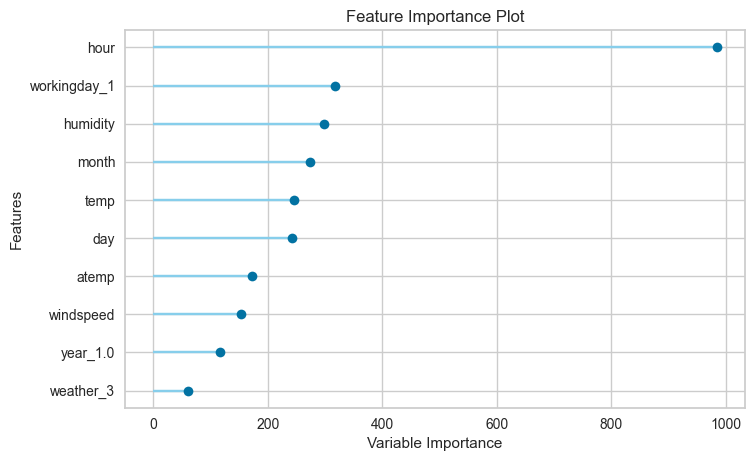

In [245]:
plot_model(best, plot='feature')

In [246]:
# To save the model with pickle file 
# save_model(best,'lightgbm-location-velo')
Tuned_rf = tune_model(rf) 
Tuned_rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0897,0.0152,0.1233,0.5645,0.0914,2.8907
1,0.0935,0.0164,0.1281,0.5503,0.0952,2.5975
2,0.0938,0.0167,0.1291,0.5495,0.0955,3.2220
3,0.0893,0.0149,0.1220,0.5719,0.0912,2.7024
4,0.0824,0.0125,0.1116,0.5909,0.0842,2.8663
5,0.0871,0.0147,0.1214,0.5740,0.0901,2.6228
6,0.0872,0.0140,0.1183,0.5916,0.0887,3.0691
7,0.0872,0.0144,0.1199,0.5860,0.0889,2.5330
8,0.0915,0.0153,0.1238,0.5571,0.0919,2.5141
9,0.0893,0.0147,0.1212,0.5622,0.0910,3.3315


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=240, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [247]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,year,month,...,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_0.9995029821073559,year_1.0
0,0,0,2.286456,2.666881,4.394449,0.000000,0.016377,0.000000,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
1,0,0,2.199444,2.612640,4.382027,0.000000,0.040942,0.043478,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
2,0,0,2.199444,2.612640,4.382027,0.000000,0.032753,0.086957,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
3,0,0,2.286456,2.666881,4.317488,0.000000,0.013306,0.130435,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
4,0,0,2.286456,2.666881,4.317488,0.000000,0.001024,0.173913,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0,0,3.267285,3.411313,4.290459,0.157870,0.349028,0.826087,1.000000,0.666667,...,0,0,1,0,0,1,0,0,0,1
9059,0,0,3.267285,3.411313,4.290459,0.228047,0.280450,0.869565,1.000000,0.666667,...,0,0,1,0,0,1,0,0,0,1
9060,0,0,3.235536,3.385915,4.356709,0.105325,0.194473,0.913043,1.000000,0.666667,...,0,0,1,0,0,0,1,0,0,1
9061,0,0,3.235536,3.385915,4.356709,0.193018,0.057318,0.956522,1.000000,0.666667,...,0,0,1,0,0,1,0,0,0,1


holiday


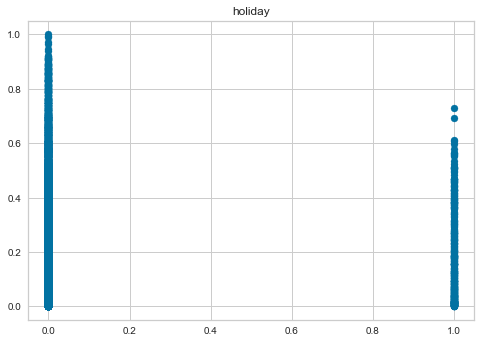

workingday


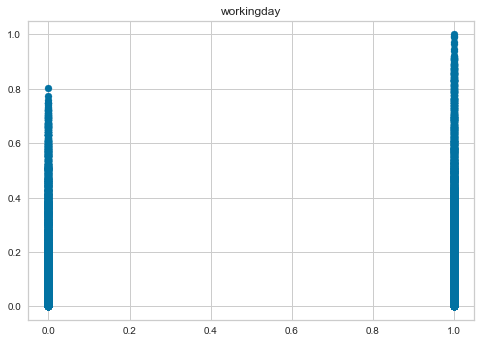

temp


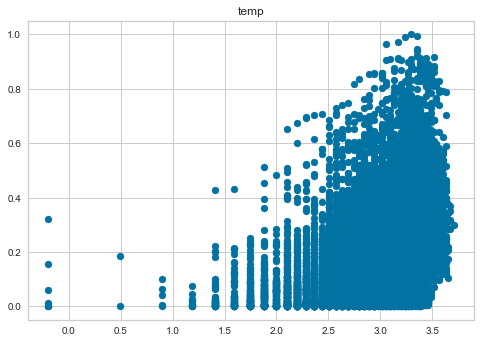

atemp


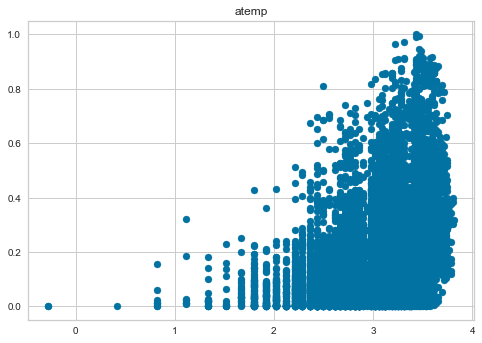

humidity


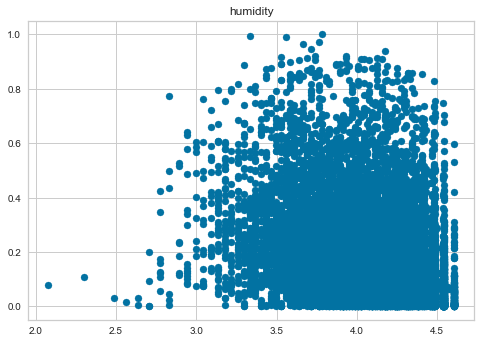

windspeed


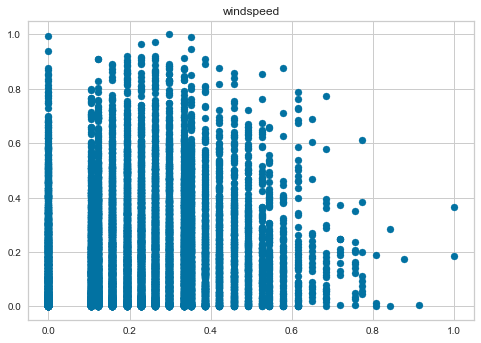

count


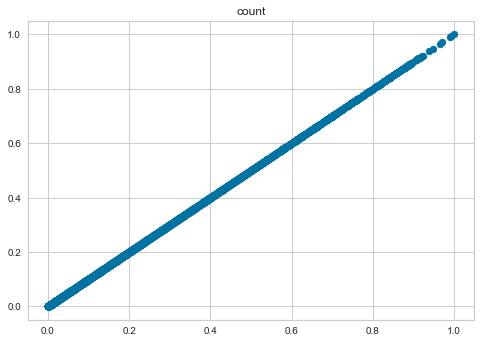

hour


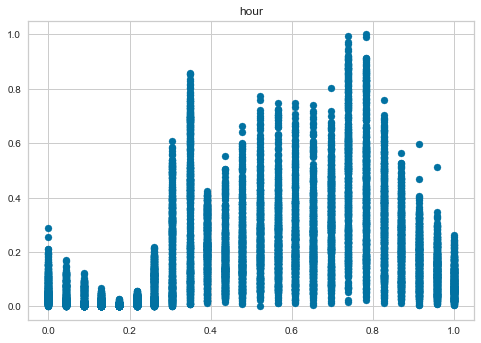

month


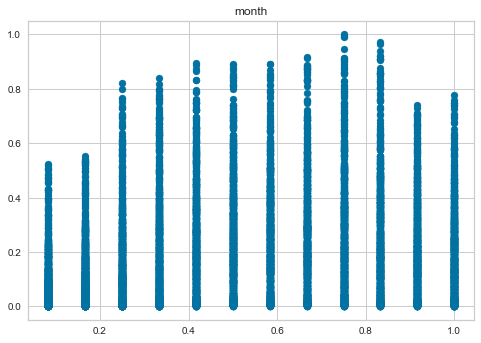

day


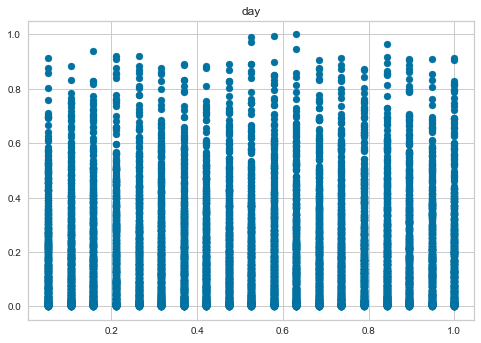

season_1


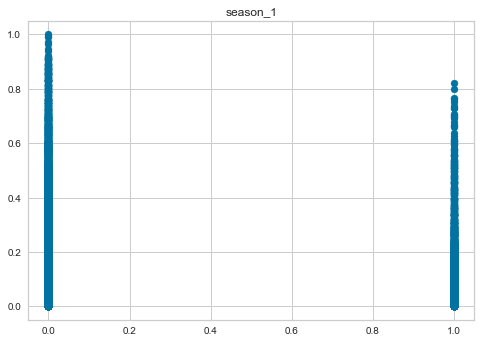

season_2


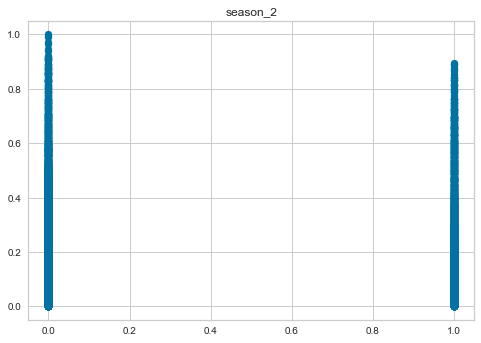

season_3


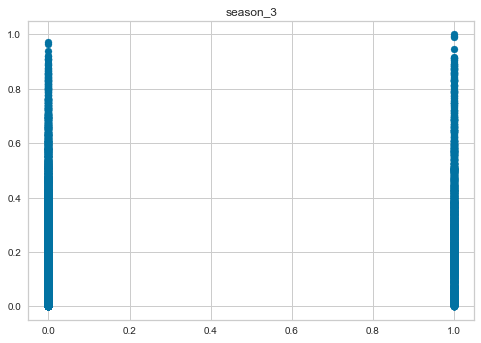

season_4


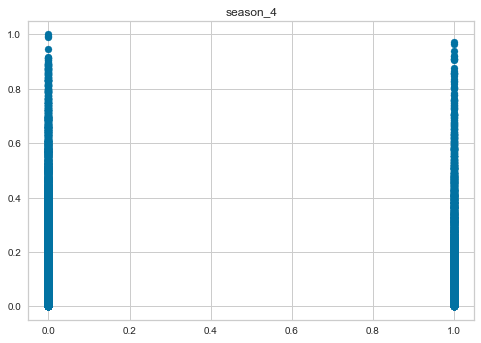

weather_1


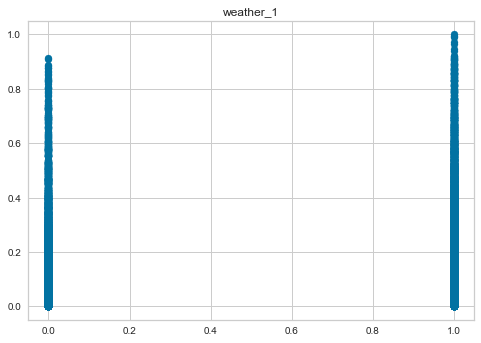

weather_2


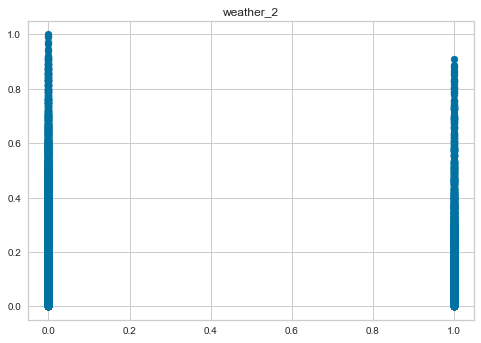

weather_3


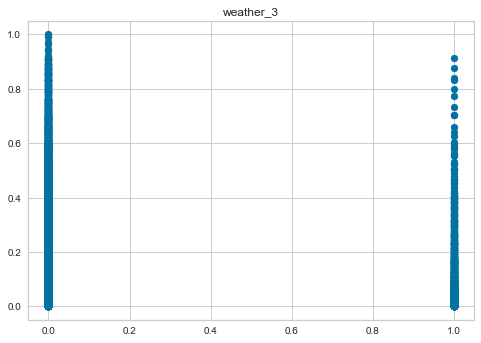

weather_4


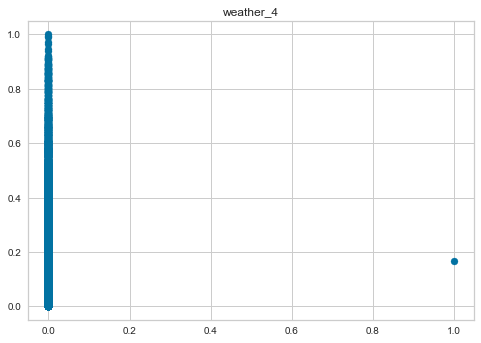

year_0.9995029821073559


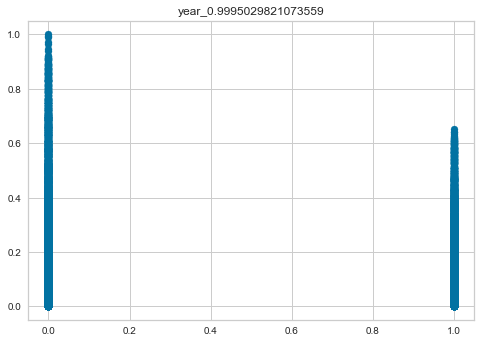

year_1.0


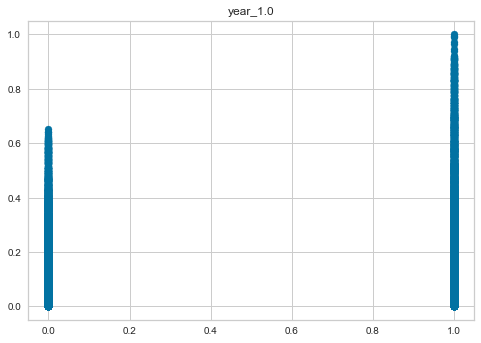

In [248]:
for i in data.columns:
    plt.title(i)
    print(i)
    plt.scatter(y = data['count'], x = data[i])
    plt.show()

In [256]:
test

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,year,month,...,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_0.9995029821073559,year_1.0
9063,0,0,3.412467,3.529004,4.127134,0.122840,0.171955,0.000000,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
9064,0,0,3.385068,3.551053,4.304065,0.157870,0.080860,0.043478,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
9065,0,0,3.356897,3.483545,4.248495,0.193018,0.070624,0.086957,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
9066,0,0,3.356897,3.483545,4.248495,0.122840,0.035824,0.130435,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
9067,0,0,3.356897,3.483545,4.248495,0.000000,0.012282,0.173913,1.0,0.75,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,2.745988,2.980365,3.912023,0.456213,0.343910,0.826087,1.0,1.00,...,0,0,0,1,1,0,0,0,0,1
10882,0,1,2.691921,2.857906,4.043051,0.263195,0.246673,0.869565,1.0,1.00,...,0,0,0,1,1,0,0,0,0,1
10883,0,1,2.634762,2.766948,4.110874,0.263195,0.171955,0.913043,1.0,1.00,...,0,0,0,1,1,0,0,0,0,1
10884,0,1,2.634762,2.857906,4.110874,0.105325,0.132037,0.956522,1.0,1.00,...,0,0,0,1,1,0,0,0,0,1


In [250]:
model = Lasso()

In [251]:
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
score


0.1251621452003956

In [252]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [257]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,year,month,...,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_0.9995029821073559,year_1.0
0,0,0,2.286456,2.666881,4.394449,0.000000,0.016377,0.000000,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
1,0,0,2.199444,2.612640,4.382027,0.000000,0.040942,0.043478,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
2,0,0,2.199444,2.612640,4.382027,0.000000,0.032753,0.086957,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
3,0,0,2.286456,2.666881,4.317488,0.000000,0.013306,0.130435,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
4,0,0,2.286456,2.666881,4.317488,0.000000,0.001024,0.173913,0.999503,0.083333,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0,0,3.267285,3.411313,4.290459,0.157870,0.349028,0.826087,1.000000,0.666667,...,0,0,1,0,0,1,0,0,0,1
9059,0,0,3.267285,3.411313,4.290459,0.228047,0.280450,0.869565,1.000000,0.666667,...,0,0,1,0,0,1,0,0,0,1
9060,0,0,3.235536,3.385915,4.356709,0.105325,0.194473,0.913043,1.000000,0.666667,...,0,0,1,0,0,0,1,0,0,1
9061,0,0,3.235536,3.385915,4.356709,0.193018,0.057318,0.956522,1.000000,0.666667,...,0,0,1,0,0,1,0,0,0,1


In [294]:
num = ['temp', 'atemp', 'humidity', 'windspeed','hour','month','day']
poly = make_pipeline(PolynomialFeatures(degree=3))
transformer = make_column_transformer((poly, num))
model = make_pipeline(transformer, RandomForestRegressor())

In [295]:
x_train = train.copy()
del x_train['count']
y_train = train['count']

x_test = test.copy()
del x_test['count']
y_test = test['count']


In [298]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.906562921033925